<a href="https://colab.research.google.com/github/pratikkhandve55/CodeSoft/blob/main/Fruad_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [22]:
# import packages
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

In [ ]:
import kagglehub
path = kagglehub.dataset_download("kartik2112/fraud-detection")

In [ ]:
print("dataset :", path)

dataset : /kaggle/input/fraud-detection


In [ ]:
print(os.listdir(path))

['fraudTest.csv', 'fraudTrain.csv']


In [ ]:
train_df = pd.read_csv(f"{path}/fraudTrain.csv")
train_df.head(50)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
train_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
# selected fetures
select_col = ['amt', 'category', 'gender', 'city_pop', 'lat', 'long', 'is_fraud']
train_df = train_df[select_col]
train_df

,amt,category,gender,city_pop,lat,long,is_fraud
0,4.97,misc_net,F,3495,36.0788,-81.1781,0
1,107.23,grocery_pos,F,149,48.8878,-118.2105,0
2,220.11,entertainment,M,4154,42.1808,-112.2620,0
3,45.00,gas_transport,M,1939,46.2306,-112.1138,0
4,41.96,misc_pos,M,99,38.4207,-79.4629,0
...,...,...,...,...,...,...,...
1296670,15.56,entertainment,M,258,37.7175,-112.4777,0
1296671,51.70,food_dining,M,100,39.2667,-77.5101,0
1296672,105.93,food_dining,M,899,32.9396,-105.8189,0
1296673,74.90,food_dining,M,1126,43.3526,-102.5411,0


In [ ]:
train_df = pd.get_dummies(train_df, columns= ['category', 'gender'])

<Axes: title={'center': 'class distrubution'}, xlabel='is_fraud'>

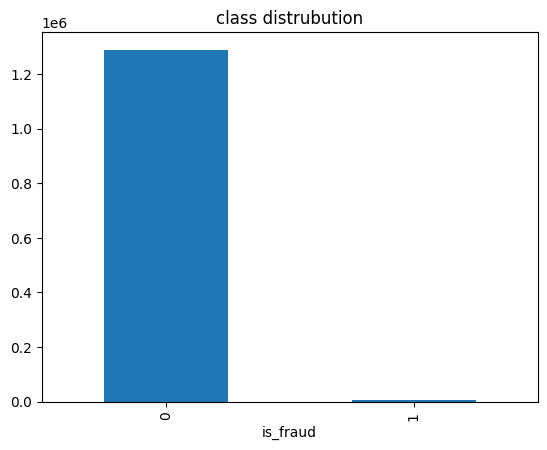

In [ ]:
train_df['is_fraud'].value_counts().plot(kind = 'bar', title = 'class distrubution')

In [ ]:
# independent and independent variabels
X = train_df.drop('is_fraud', axis = 1)
y = train_df['is_fraud']

In [ ]:
# spliting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
print(X_train)

           amt  city_pop      lat      long  category_entertainment  \
971445   76.28       743  48.2777 -112.8456                   False   
896742   63.60    163415  39.1329  -95.7023                   False   
965373  100.42      1078  36.3850  -98.0727                   False   
186355   70.03     21125  40.1159  -74.8536                   False   
280708   13.27      9993  41.1901  -74.0436                   False   
...        ...       ...      ...       ...                     ...   
359783    4.47      5760  38.9462  -94.9714                   False   
152315  147.01       165  42.6315  -75.1866                   False   
963395   58.14      4090  33.4044  -96.2238                   False   
117952   30.20      5548  44.8755  -88.1555                    True   
305711   60.05       263  31.6591  -96.8094                   False   

        category_food_dining  category_gas_transport  category_grocery_net  \
971445                 False                   False                 

In [ ]:
# Train the model using RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced_subsample',
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('classification_repot:\n')
print(classification_report(y_test, y_pred))

classification_repot:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257811
           1       0.28      0.88      0.42      1524

    accuracy                           0.99    259335
   macro avg       0.64      0.93      0.71    259335
weighted avg       1.00      0.99      0.99    259335



<function matplotlib.pyplot.show(close=None, block=None)>

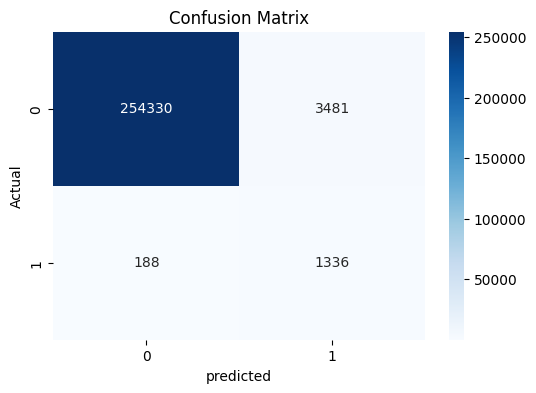

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

In [21]:
# Select 3 random fraud samples
fraud_samples = train_df[train_df['is_fraud'] == 1].sample(3, random_state=42)

# Loop through each sample and test it
for idx, row in fraud_samples.iterrows():
    sample = pd.DataFrame([{
    'amt': 1000,
    'city_pop': 230,
    'lat': 20.5,
    'long': 75.2,
    'category': 'misc_net',
    'gender': 'F'
     }])
    sample_encoded = pd.get_dummies(sample, columns=['category', 'gender'], drop_first=True)

    for col in X.columns:
        if col not in sample_encoded.columns:
            sample_encoded[col] = 0
    sample_encoded = sample_encoded[X.columns]

    # Predict
    pred = model.predict(sample_encoded)[0]
    proba = model.predict_proba(sample_encoded)[0][1]

    print(f"\n Sample {idx}")
    print(f"Prediction: {' FRAUD' if pred == 1 else ' Not Fraud'}")
    print(f"Fraud Probability: {proba*100:.2f}%")


 Sample 758837
Prediction:  FRAUD
Fraud Probability: 59.64%

 Sample 981412
Prediction:  FRAUD
Fraud Probability: 59.64%

 Sample 799445
Prediction:  FRAUD
Fraud Probability: 59.64%
